# ランダムフォレスト

In [0]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer

In [0]:
cancer = load_breast_cancer()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=42
)

In [0]:
models = {
    'RandomForest': RandomForestClassifier(criterion='gini',
                                           n_estimators=100, 
                                           max_depth=2, 
                                           max_features='auto', 
                                           min_samples_leaf=1, 
                                           n_jobs=None,
                                           oob_score=False, 
                                           random_state=0, 
                                           verbose=0, 
                                           warm_start=False),
    'GradientBoost': GradientBoostingClassifier(random_state=0)
}

In [0]:
scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'train_score')] = model.score(X_train, y_train)
    scores[(model_name, 'test_score')] = model.score(X_test, y_test)
pd.Series(scores).unstack()

,test_score,train_score
GradientBoost,0.958042,1.000000
RandomForest,0.972028,0.964789


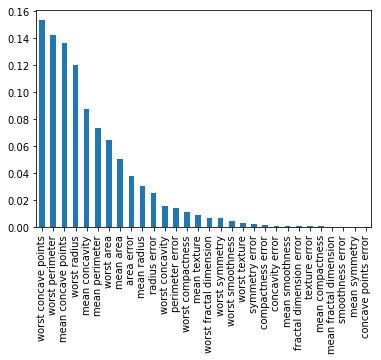

In [0]:
# モデル構築の中でどの変数が重要な役割を担ったのかを定量的に把握する
s = pd.Series(models['RandomForest'].feature_importances_, 
              index=cancer.feature_names )

# 取得した値を降順に表示
s.sort_values(ascending=False).plot.bar(color='C0')

## グリッドサーチとランダムフォレスト

In [0]:
from sklearn.model_selection import GridSearchCV

# パラメータの設定
param_grid = {
    'n_estimators': [100],
    'max_features': [1, 'auto', None],
    'max_depth': [1, 5, 10, None],
    'min_samples_leaf': [1, 2, 4,]
}

In [0]:
model = RandomForestClassifier(criterion='gini',
                               n_estimators=100, 
                               max_depth=2, 
                               max_features='auto', 
                               min_samples_leaf=1, 
                               n_jobs=None,
                               oob_score=False, 
                               random_state=0, 
                               verbose=0, 
                               warm_start=False)

In [0]:
grid_search = GridSearchCV(model,param_grid,cv=5)

In [0]:
grid_search.fit(X_train,y_train)

print("Test set score:{:.4f}".format(grid_search.score(X_test,y_test)))
print("Best parameters:{}".format(grid_search.best_params_))
print("Best cross-validation score:{:.2f}".format(grid_search.best_score_))

Test set score:0.9720
Best parameters:{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 100}
Best cross-validation score:0.96


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
